In [1]:
import logging
from utility import add_project_root_to_path

logging.basicConfig(level=logging.ERROR)

add_project_root_to_path()

In [2]:
from experiments.experiment import HistoricalDataDescription
from datetime import datetime

historical_data_description = HistoricalDataDescription(
    start_time=datetime(2024, 4, 1, 12, 0, 0),
    end_time=datetime(2024, 4, 30, 12, 0, 0),
)

# "volatile_market": HistoricalDataDescription(
#     start_time=datetime(2024, 3, 1, 12, 0, 0),
#     end_time=datetime(2024, 3, 31, 12, 0, 0),
# ),
# "calm_market": HistoricalDataDescription(
#     start_time=datetime(2024, 8, 1, 12, 0, 0),
#     end_time=datetime(2024, 8, 31, 12, 0, 0),
# ),
# "bull_market": HistoricalDataDescription(
#     start_time=datetime(2024, 11, 1, 12, 0, 0),
#     end_time=datetime(2024, 11, 30, 12, 0, 0),
# ),
# "bear_market": HistoricalDataDescription(
#     start_time=datetime(2024, 4, 1, 12, 0, 0),
#     end_time=datetime(2024, 4, 30, 12, 0, 0),
# ),

In [3]:
from experiments.historical_data import get_experiment_historical_data
from pathlib import Path

historical_data = get_experiment_historical_data(
    data_root=Path("data"),
    description=historical_data_description,
)

In [4]:
historical_data

,time,price_A,price_B
0,2024-04-01 10:00:00,3539.93,0.000029
1,2024-04-01 10:01:00,3539.78,0.000029
2,2024-04-01 10:02:00,3540.00,0.000029
3,2024-04-01 10:03:00,3542.80,0.000029
4,2024-04-01 10:04:00,3543.60,0.000029
...,...,...,...
41756,2024-04-30 09:56:00,3053.01,0.000023
41757,2024-04-30 09:57:00,3050.71,0.000023
41758,2024-04-30 09:58:00,3047.98,0.000023
41759,2024-04-30 09:59:00,3049.13,0.000023


In [5]:
from experiments.synthetic_data import extract_gbm_params, generate_synthetic_data
from experiments.experiment import SyntheticDataDescription

In [6]:
gbm_parameters = extract_gbm_params(
   historical_data[["price_A", "price_B"]].transpose().to_numpy()
)

In [7]:
gbm_parameters

GBMParameters(S0=[3539.93, 2.858e-05], mu=[-3.5843786641630628e-06, -4.891135343153541e-06], cov_matrix=array([[9.69680101e-07, 1.32425664e-06],
       [1.32425664e-06, 3.19313094e-06]]))

In [8]:
import numpy as np

np.random.seed(0)

synthetic_data_description = SyntheticDataDescription(
    gbm_parameters=gbm_parameters,
    start_time=historical_data_description.start_time,
    end_time=historical_data_description.end_time,
    candle_interval="1min",
)

In [9]:
synthetic_data = generate_synthetic_data(synthetic_data_description)

In [10]:
synthetic_data

,time,price_A,price_B
0,2024-04-01 12:00:00,3539.930000,0.000029
1,2024-04-01 12:01:00,3534.008163,0.000028
2,2024-04-01 12:02:00,3526.887523,0.000028
3,2024-04-01 12:03:00,3523.297026,0.000028
4,2024-04-01 12:04:00,3520.809661,0.000028
...,...,...,...
41756,2024-04-30 11:56:00,3574.091241,0.000034
41757,2024-04-30 11:57:00,3575.066677,0.000034
41758,2024-04-30 11:58:00,3571.627441,0.000034
41759,2024-04-30 11:59:00,3574.948019,0.000034


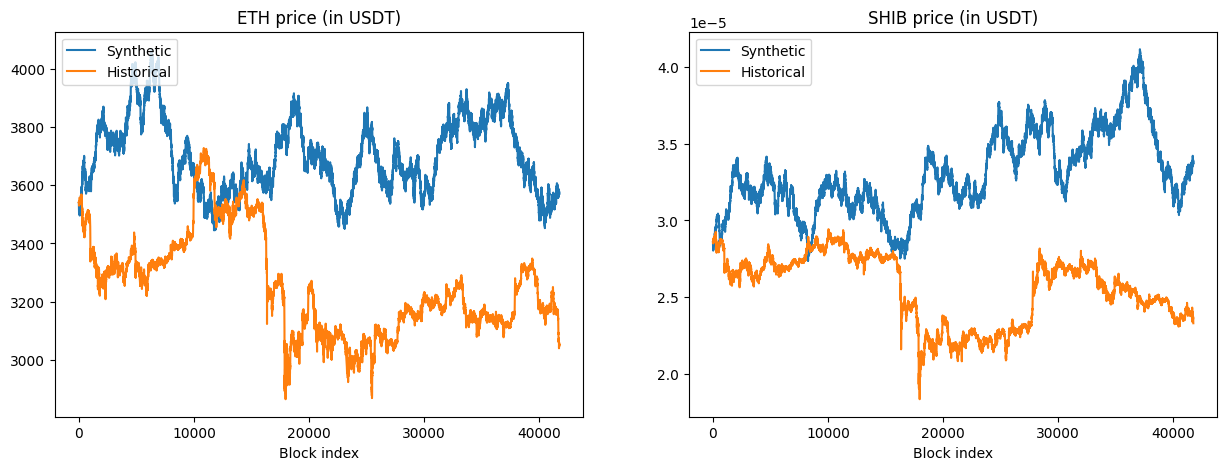

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

A_symbol = historical_data_description.A_symbol
B_symbol = historical_data_description.B_symbol
stable_coin_symbol = historical_data_description.stable_coin_symbol

ax[0].plot(synthetic_data["price_A"], label="Synthetic")
ax[0].plot(historical_data["price_A"], label="Historical")

ax[1].plot(synthetic_data["price_B"], label="Synthetic")
ax[1].plot(historical_data["price_B"], label="Historical")

ax[0].set_title(f"{A_symbol} price (in {stable_coin_symbol})")
ax[1].set_title(f"{B_symbol} price (in {stable_coin_symbol})")

ax[0].set_xlabel("Block index")
ax[1].set_xlabel("Block index")

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")

plt.show()